# Yahoo A1Benchmark Dataset Visualization
## Plot all 67 datasets from A1Benchmark

In [1]:
# Import necessary libraries
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import polars as pl
import seaborn as sns
import warnings

logging.basicConfig(level=logging.INFO)
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
plt.rcParams.update(
    {
        "axes.edgecolor": "0.3",
        "axes.linewidth": 0.8,
        "font.size": 10,
        "axes.titlesize": 11,
        "axes.labelsize": 10,
        "axes.titleweight": "bold",
        "legend.fontsize": 8,
        "figure.dpi": 120,
        "legend.frameon": False,
    }
)

In [2]:
# Load all 67 Yahoo A1Benchmark datasets
data_dir = "../../datasets/Yahoo/data/A1Benchmark"
yahoo_data = {}

# Load all datasets from real_1.csv to real_67.csv
for file_id in range(1, 68):
    file_path = os.path.join(data_dir, f"real_{file_id}.csv")
    if os.path.exists(file_path):
        df = pl.read_csv(file_path)
        yahoo_data[file_id] = df
        
        # Print basic statistics
        total_points = len(df)
        anomaly_count = (df["is_anomaly"] == 1).sum()
        anomaly_rate = anomaly_count / total_points * 100
        
        if file_id <= 5 or file_id % 10 == 0:  # Print first 5 and every 10th
            print(f"real_{file_id}.csv: {total_points} points, "
                  f"{anomaly_count} anomalies ({anomaly_rate:.2f}%)")

print(f"\nTotal datasets loaded: {len(yahoo_data)}")

real_1.csv: 1420 points, 2 anomalies (0.14%)
real_2.csv: 1439 points, 16 anomalies (1.11%)
real_3.csv: 1461 points, 14 anomalies (0.96%)
real_4.csv: 1423 points, 5 anomalies (0.35%)
real_5.csv: 1439 points, 2 anomalies (0.14%)
real_10.csv: 1439 points, 13 anomalies (0.90%)
real_20.csv: 1422 points, 2 anomalies (0.14%)
real_30.csv: 1461 points, 9 anomalies (0.62%)
real_40.csv: 1427 points, 80 anomalies (5.61%)
real_50.csv: 1439 points, 7 anomalies (0.49%)
real_60.csv: 1461 points, 16 anomalies (1.10%)

Total datasets loaded: 67


In [3]:
# Visualization function for Yahoo time series
def plot_yahoo_timeseries(data_dict, file_ids, cols=4, figsize_per_plot=(5, 3)):
    """
    Plot Yahoo time series with anomaly markers
    
    Args:
        data_dict: Dictionary with file_id as key and DataFrame as value
        file_ids: List of file IDs to plot
        cols: Number of columns in the subplot grid
        figsize_per_plot: Size of each subplot (width, height)
    """
    n_files = len(file_ids)
    rows = (n_files + cols - 1) // cols  # Ceiling division
    
    figsize = (figsize_per_plot[0] * cols, figsize_per_plot[1] * rows)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Flatten axes array for easier iteration
    if rows == 1 and cols == 1:
        axes = np.array([axes])
    axes = axes.flatten() if n_files > 1 else [axes]
    
    for idx, file_id in enumerate(file_ids):
        ax = axes[idx]
        df = data_dict[file_id]
        
        # Extract data
        timestamps = df["timestamp"].to_numpy()
        values = df["value"].to_numpy()
        is_anomaly = df["is_anomaly"].to_numpy()
        
        # Plot time series
        ax.plot(
            timestamps,
            values,
            color="#2E86AB",
            linewidth=1.0,
            alpha=0.7,
            label="Normal"
        )
        
        # Mark anomalies
        anomaly_mask = is_anomaly == 1
        if anomaly_mask.sum() > 0:
            ax.scatter(
                timestamps[anomaly_mask],
                values[anomaly_mask],
                color="#E63946",
                s=5,
                marker=".",
                zorder=5,
                edgecolors="darkred",
                linewidths=0.8,
                label="Anomaly"
            )
        
        # Statistics
        total_anomalies = anomaly_mask.sum()
        anomaly_rate = total_anomalies / len(values) * 100
        
        # Set title
        ax.set_title(
            f"real_{file_id} | {len(values)} pts | "
            f"{total_anomalies} anomalies ({anomaly_rate:.2f}%)",
            fontsize=10,
            fontweight="bold",
            pad=8
        )
        
        ax.set_xlabel("Timestamp", fontsize=9)
        ax.set_ylabel("Value", fontsize=9)
        
        # Style
        ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
        if idx == 0 and anomaly_mask.sum() > 0:  # Show legend only on first plot
            ax.legend(loc="upper right", fontsize=8, framealpha=0.9)
        
        # Remove top and right spines
        sns.despine(ax=ax)
    
    # Hide unused subplots
    for idx in range(n_files, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    return fig

print("Visualization function defined successfully")

Visualization function defined successfully


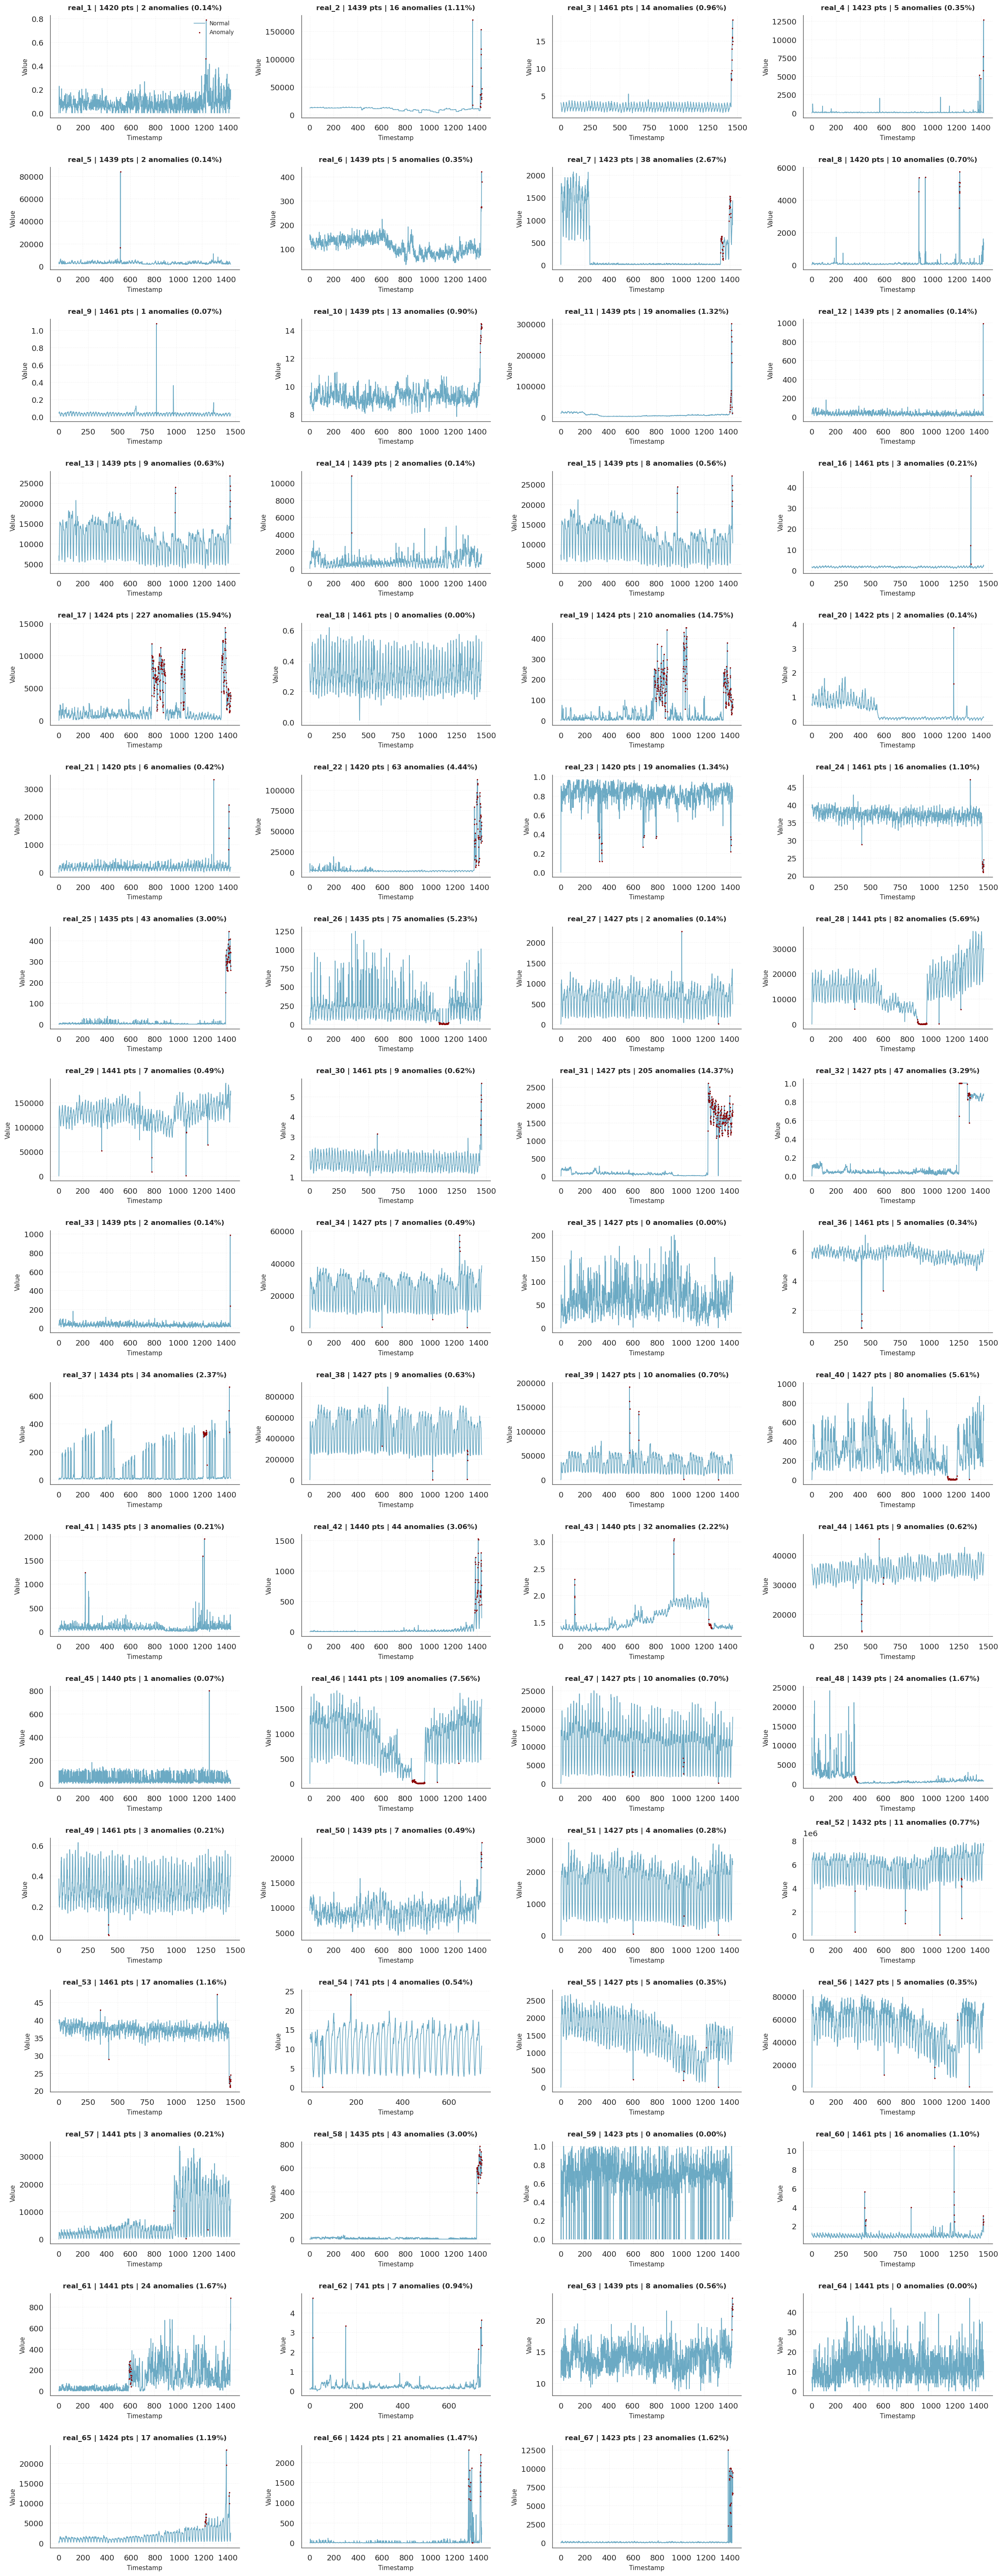


Visualization completed!


In [6]:
selected_file_ids = range(1, 68)

fig = plot_yahoo_timeseries(
    data_dict=yahoo_data,
    file_ids=selected_file_ids,
    cols=4,
    figsize_per_plot=(5, 3)
)

plt.show()
print("\nVisualization completed!")

In [4]:
# Save the complete figure
output_dir = "../../datasets/Yahoo/figures"
os.makedirs(output_dir, exist_ok=True)

print("Saving Yahoo time series figure for all 67 datasets...")

all_file_ids = list(range(1, 68))
fig = plot_yahoo_timeseries(
    data_dict=yahoo_data,
    file_ids=all_file_ids,
    cols=4,
    figsize_per_plot=(5, 3)
)

output_path = os.path.join(output_dir, 'yahoo_all_67_datasets.png')
fig.savefig(output_path, dpi=150, bbox_inches='tight')
plt.close(fig)

print(f"✓ Figure saved to: {output_path}")

Saving Yahoo time series figure for all 67 datasets...
✓ Figure saved to: ../../datasets/Yahoo/figures/yahoo_all_67_datasets.png


In [5]:
# Optional: Plot specific subsets (e.g., first 20, middle 20, last 20)
subsets = {
    "first_20": list(range(1, 21)),
    "middle_20": list(range(24, 44)),
    "last_20": list(range(48, 68))
}

for subset_name, file_ids in subsets.items():
    print(f"\nPlotting {subset_name}: {len(file_ids)} datasets")
    fig = plot_yahoo_timeseries(
        data_dict=yahoo_data,
        file_ids=file_ids,
        cols=4,
        figsize_per_plot=(5, 3)
    )
    
    output_path = os.path.join(output_dir, f'yahoo_{subset_name}.png')
    fig.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.close(fig)
    
    print(f"✓ Saved to: {output_path}")

print("\nAll subset figures saved!")


Plotting first_20: 20 datasets
✓ Saved to: ../../datasets/Yahoo/figures/yahoo_first_20.png

Plotting middle_20: 20 datasets
✓ Saved to: ../../datasets/Yahoo/figures/yahoo_middle_20.png

Plotting last_20: 20 datasets
✓ Saved to: ../../datasets/Yahoo/figures/yahoo_last_20.png

All subset figures saved!


In [7]:
# Generate comprehensive statistics for all datasets
stats_list = []

for file_id in range(1, 68):
    if file_id in yahoo_data:
        df = yahoo_data[file_id]
        
        total_points = len(df)
        total_anomalies = (df["is_anomaly"] == 1).sum()
        anomaly_rate = total_anomalies / total_points * 100
        
        values = df["value"].to_numpy()
        
        stats_list.append({
            "File": f"real_{file_id}",
            "Total Points": total_points,
            "Anomalies": total_anomalies,
            "Anomaly Rate (%)": f"{anomaly_rate:.2f}",
            "Mean": f"{np.mean(values):.2f}",
            "Std": f"{np.std(values):.2f}",
            "Min": f"{np.min(values):.2f}",
            "Max": f"{np.max(values):.2f}"
        })

# Convert to DataFrame
stats_df = pl.DataFrame(stats_list)

print("="*100)
print("Yahoo A1Benchmark - Comprehensive Statistics (All 67 Datasets)")
print("="*100)
print(stats_df)

# Save statistics to CSV
stats_path = os.path.join(output_dir, "yahoo_statistics.csv")
stats_df.write_csv(stats_path)
print(f"\n✓ Statistics saved to: {stats_path}")

Yahoo A1Benchmark - Comprehensive Statistics (All 67 Datasets)
shape: (67, 8)
┌─────────┬──────────────┬───────────┬──────────────────┬──────────┬─────────┬─────────┬───────────┐
│ File    ┆ Total Points ┆ Anomalies ┆ Anomaly Rate (%) ┆ Mean     ┆ Std     ┆ Min     ┆ Max       │
│ ---     ┆ ---          ┆ ---       ┆ ---              ┆ ---      ┆ ---     ┆ ---     ┆ ---       │
│ str     ┆ i64          ┆ i64       ┆ str              ┆ str      ┆ str     ┆ str     ┆ str       │
╞═════════╪══════════════╪═══════════╪══════════════════╪══════════╪═════════╪═════════╪═══════════╡
│ real_1  ┆ 1420         ┆ 2         ┆ 0.14             ┆ 0.08     ┆ 0.06    ┆ 0.00    ┆ 0.79      │
│ real_2  ┆ 1439         ┆ 16        ┆ 1.11             ┆ 11020.08 ┆ 7767.71 ┆ 3594.00 ┆ 170029.00 │
│ real_3  ┆ 1461         ┆ 14        ┆ 0.96             ┆ 3.00     ┆ 1.13    ┆ 1.86    ┆ 18.85     │
│ real_4  ┆ 1423         ┆ 5         ┆ 0.35             ┆ 104.17   ┆ 475.07  ┆ 5.00    ┆ 12673.00  │
│ real_5  ┆ 1